C:\Users\Jagan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


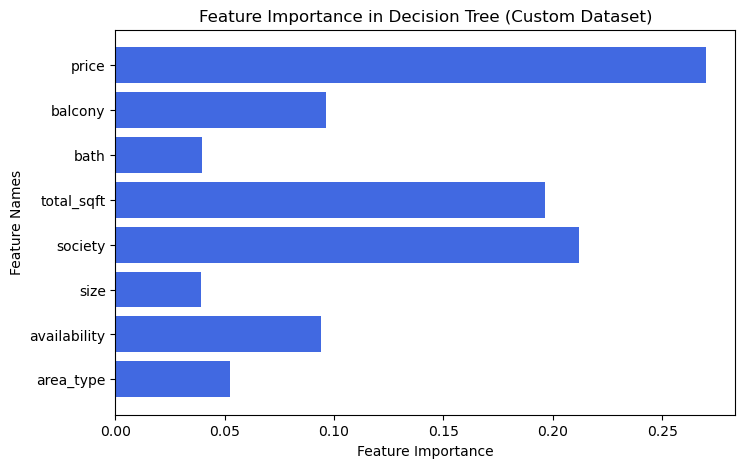

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load custom dataset
df = pd.read_csv("house_prices.csv")

# Handle missing values (optional)
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill missing values with median

# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target
X = df.iloc[:, :-1]  # All columns except last
y = df.iloc[:, -1]   # Target column

# Split dataset into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Train Decision Tree with GridSearchCV
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# Best model and parameters
best_tree = clf.best_estimator_
print("Best Parameters:", clf.best_params_)

# Feature importance
feature_importances = best_tree.feature_importances_

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(X.columns, feature_importances, color='royalblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Decision Tree (Custom Dataset)")
plt.show()

# Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



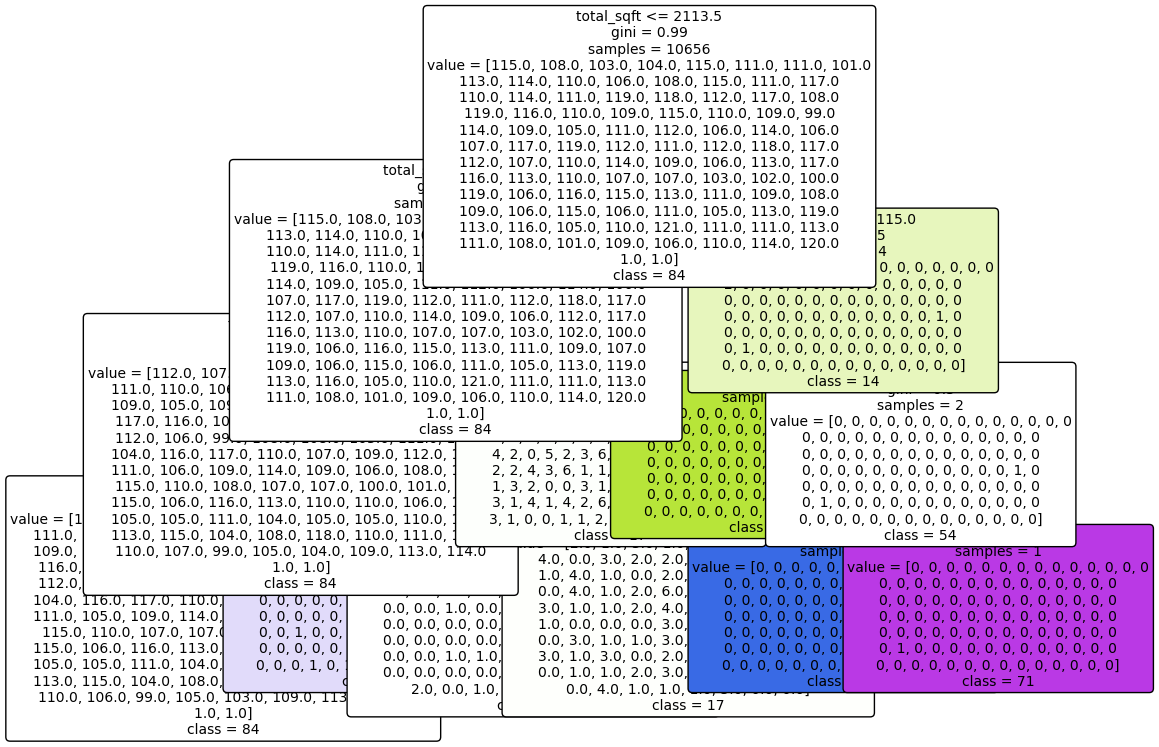

In [24]:
best_tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth
best_tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(best_tree, 
          filled=True, 
          feature_names=X.columns, 
          class_names=[str(cls) for cls in set(y)], 
          rounded=True, 
          fontsize=10)
plt.show()
